In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Задание 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).  
Произвести расчет как с использованием intercept, так и без.



In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
X = zp
y = ks
n = X.shape[0]

In [4]:
def mse_(w0, w1, y=y, x=X, n=10):
    return np.sum((w0 + w1*X - y)**2) / n

In [5]:
def plot_(w0, w1, y=y, x=X):
    y_pred = w0 + X*w1
    plt.plot(X, y_pred)
    plt.scatter(X, y)

In [6]:
def show_(w0, w1, y=y, x=X, sep='\n', pref=''):
    print(f'{pref}{sep}w0: {round(w0, 4)}; {sep}w1: {round(w1, 4)}; {sep}mse: {round(mse_(w0,w1), 4)}')

In [7]:
def result_(w0, w1, y=y, x=X, n=10):
    show_(w0, w1, pref='Ответ')
    plot_(w0, w1)
    

### Через Ковариацию

In [8]:
b = (np.mean(X*y) - np.mean(X)*np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
a = np.mean(y) - b * np.mean(X)

Ответ
w0: 444.1774; 
w1: 2.6205; 
mse: 6470.4142


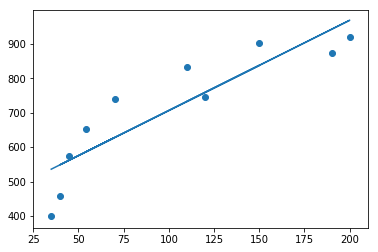

In [9]:
result_(a,b)

### Через матрицы без intercept

$ W = (X \cdot X^T)^{-1} \cdot X \cdot y^T$

In [10]:
X_r = X.reshape((1,10)) 
y_r = y.reshape((1,10))

In [11]:
W = np.linalg.inv(X_r @ X_r.T) @ X_r @ y_r.T
w1 = W[0,0]

Ответ
w0: 0; 
w1: 5.8898; 
mse: 56516.8584


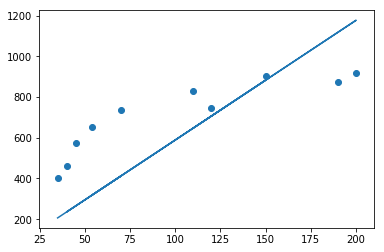

In [12]:
result_(0,w1)

### Через матрицы с рассчетом intercept

In [13]:
X_r = X.reshape((1,10)) 
X_r = np.vstack([np.ones((1,10)), X_r])

In [14]:
W = np.linalg.inv(X_r @ X_r.T) @ X_r @ y_r.T
w0 = W[0,0]
w1 = W[1,0]

Ответ
w0: 444.1774; 
w1: 2.6205; 
mse: 6470.4142


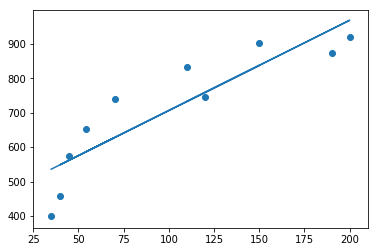

In [15]:
result_(w0,w1)

## Задание 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).



In [16]:
alpha = 3*1e-6

In [17]:
w1 = 0.1

In [18]:
for i in range(1000):
    w1 -= alpha * (2/n) * np.sum((w1*X - y) * X)
    if i%100 == 0:
        show_(0, w1, sep='\t', pref=i)

0	w0: 0; 	w1: 0.5786; 	mse: 445144.1331
100	w0: 0; 	w1: 5.8889; 	mse: 56516.8709
200	w0: 0; 	w1: 5.8898; 	mse: 56516.8584
300	w0: 0; 	w1: 5.8898; 	mse: 56516.8584
400	w0: 0; 	w1: 5.8898; 	mse: 56516.8584
500	w0: 0; 	w1: 5.8898; 	mse: 56516.8584
600	w0: 0; 	w1: 5.8898; 	mse: 56516.8584
700	w0: 0; 	w1: 5.8898; 	mse: 56516.8584
800	w0: 0; 	w1: 5.8898; 	mse: 56516.8584
900	w0: 0; 	w1: 5.8898; 	mse: 56516.8584


Ответ
w0: 0; 
w1: 5.8898; 
mse: 56516.8584


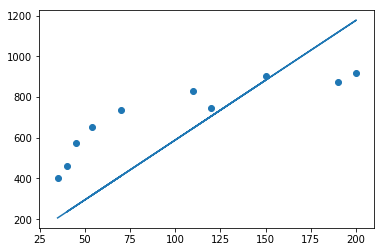

In [19]:
result_(0, w1)

## Задание 3

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?



Табличные значения функции Лапласа используются, когда известна дисперсия или сигма генеральной совокупности. 
Распределение Стьюдента используется для поиска истиных значений доверительного интервала генеральной совокупности.
Коэффициент доверительного интервала (t-критерий) будет одинаковый и по таблице Стьюдента и по таблице Лапласа при числе степеней свободы стремящемся к бесконечности. Как правило в таблицах указывают одинаковые коэффициенты уже при значениях больших чем 300.

## Задание 4

*4) Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [20]:
w1 = 0.1
w0 = 0.1

In [21]:
def mse_(w0, w1, y=y, x=X, n=10):
    return np.sum((w0 + w1*X - y)**2) / n

f = (1/n) * np.sum((w0 + w1*X - y)**2)

f_p = (2/n) * np.sum((w0 + w1*X - y) * X)

0	w0: 1.0978; 	w1: 11.2528; 	mse: 453696.5545
100000	w0: 431.4639; 	w1: 2.7141; 	mse: 6511.4144
200000	w0: 443.8126; 	w1: 2.6232; 	mse: 6470.448
300000	w0: 444.1669; 	w1: 2.6206; 	mse: 6470.4142
400000	w0: 444.1771; 	w1: 2.6205; 	mse: 6470.4142
500000	w0: 444.1773; 	w1: 2.6205; 	mse: 6470.4142
600000	w0: 444.1774; 	w1: 2.6205; 	mse: 6470.4142
700000	w0: 444.1774; 	w1: 2.6205; 	mse: 6470.4142
800000	w0: 444.1774; 	w1: 2.6205; 	mse: 6470.4142
900000	w0: 444.1774; 	w1: 2.6205; 	mse: 6470.4142
Ответ
w0: 444.1774; 
w1: 2.6205; 
mse: 6470.4142


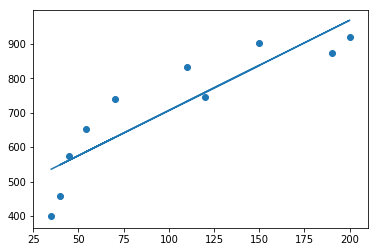

In [22]:

def my_grad_funct(X, y, w, max_it, alpha):
    for i in range(max_it):
        y_pred = np.dot(X.T, w)
        w[0] -= alpha * (2/n) * np.sum((y_pred - y) * X[0])
        w[1] -= alpha * (2/n) * np.sum((y_pred - y) * X[1])
        if i % (max_it / 10) == 0:
            show_(w[0], w[1], sep='\t', pref=i)
    return w


alpha = 7*10**(-5)
X_r = X.reshape((1,10)) 
X_r = np.vstack([np.ones((1,10)), X_r])
start_w = [1, 0.1]
iteration = 1000000

w = my_grad_funct(X_r, y, start_w, iteration, alpha)

result_(w[0], w[1])

444.1773573243596 [2.62053888]
Ответ
w0: 444.1774; 
w1: 2.6205; 
mse: 6470.4142


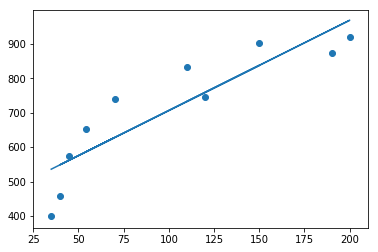

In [24]:
regressor = LinearRegression()
regressor.fit(X.reshape((10,1)), y)
print(regressor.intercept_, regressor.coef_)
result_(regressor.intercept_, regressor.coef_[0])